# Ejercicio 1: Preparación del ambiente de trabajo

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pickle

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('ames_housing.csv').drop('Unnamed: 0', axis=1)

# Ejercicio 2: Importación de archivos serializados

### Predicciones y Métricas de desempeño

#### 1. Modelo propio

In [3]:
# reading pickle model and test data
pickle_model = pickle.load(open('pickles/model_.sav','rb'))
X_train_pickle = pickle.load(open('pickles/X_train.sav','rb'))
y_train_pickle = pickle.load(open('pickles/y_train.sav','rb'))
X_test_pickle = pickle.load(open('pickles/X_test.sav','rb'))
y_test_pickle = pickle.load(open('pickles/y_test.sav','rb'))

In [4]:
# funcion que despliega metricas para un modelo y su conjunto de validación
def report_metrics(model, y_true, X_test):
    y_predict = model.predict(X_test)
    print(f'MSE: {mean_squared_error(y_true, y_predict)}')
    print(f'MAE: {median_absolute_error(y_true, y_predict)}')
    print(f'R2: {r2_score(y_true, y_predict)}')

In [5]:
report_metrics(pickle_model, y_test_pickle, X_test_pickle)

MSE: 1430100140.1309152
MAE: 16662.549180327856
R2: 0.748376052981181


#### 2. Modelo compañero

In [7]:
# reading pickle model and test data
pickle_model_class = pickle.load(open('pickles_merbs/model_merbs.sav','rb'))
X_train_pickle_class = pickle.load(open('pickles_merbs/X_train_merbs.sav','rb'))
y_train_pickle_class = pickle.load(open('pickles_merbs/y_train_merbs.sav','rb'))
X_test_pickle_class = pickle.load(open('pickles_merbs/X_test_merbs.sav','rb'))
y_test_pickle_class = pickle.load(open('pickles_merbs/y_test_merbs.sav','rb'))

In [8]:
report_metrics(pickle_model_class, y_test_pickle_class, X_test_pickle_class)

MSE: 1636382407.3214855
MAE: 15830.0
R2: 0.7120810014572155


#### Contraste entre modelos --> resultados

Resultados: 

* El R2 de mi modelo es mejor, superando por 3% el modelo de mi compañero
* La causal es probablemente debido a los hiperparámetros del modelo predictivo; en ello, el modelo podría estar haciendo un overfitting limitandose para realizar mejores estimaciones
* También puede estar incluyendo un número menor de atributos y pecamos de no incluir algún atributo que explique de buena manera

# Ejercicio 3: Evaluación Random Forest

In [11]:
rf_model = RandomForestRegressor(random_state=2367992).fit(X_train_pickle, y_train_pickle)

In [12]:
report_metrics(rf_model, y_test_pickle, X_test_pickle)

MSE: 991416294.1829966
MAE: 12379.960000000006
R2: 0.8255618092182975


En comparación al modelo propio, y el de mi compañero:

* Visualizamos una mejora sustantiva en el R2, subiendo 8% hacia una mejor explicación de la variabilidad en la variable "Sale_price"
* Dado ello, también se ven disminuidas las métricas MSE y MAE

# Ejercicio 4: Reporte las métricas de desempeño

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
oob_none, oob_log2, oob_sqrt = [], [], []
n_estimators = range(20, 1000, 25)

for n_ in n_estimators:
    rf_none = RandomForestRegressor(n_estimators= n_,
                                    max_features=None, 
                                    oob_score=True,
                                    random_state=123).fit(X_train_pickle, y_train_pickle)
                    
    rf_log2 = RandomForestRegressor(n_estimators= n_,
                                    max_features='log2', 
                                    oob_score=True,
                                    random_state=123).fit(X_train_pickle, y_train_pickle)
                        
    rf_sqrt = RandomForestRegressor(n_estimators= n_,
                                    max_features='sqrt', 
                                    oob_score=True,
                                    random_state=123).fit(X_train_pickle, y_train_pickle)
                            
    oob_none.append(1 - rf_none.oob_score_)
    oob_log2.append(1 - rf_log2.oob_score_)
    oob_sqrt.append(1 - rf_sqrt.oob_score_)

<Figure size 864x288 with 0 Axes>

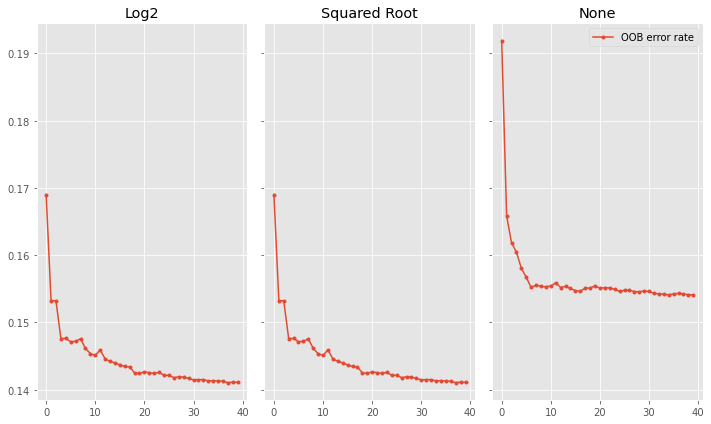

In [15]:
# graficamos comportamiento del OOB score
plt.figure(figsize=(12, 4));
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True);
axs[0].plot(oob_log2, '.-', label='OOB error rate');
axs[0].set_title('Log2');
axs[1].plot(oob_sqrt,'.-', label='OOB error rate');
axs[1].set_title('Squared Root');
axs[2].plot(oob_none, '.-', label='OOB error rate');
axs[2].set_title('None');
plt.tight_layout();
plt.legend();

# Ejercicio 5: Refactoriza el modelo

Dado los gráficos anteriores, visualizamos que:

* El menor OOB error lo entrega utilizar max_features='log2'
* El número de estimadores con mejor rendimiento es: n_estimators=40

In [19]:
# refactorizamos y reentrenamos el modelo
best_model = RandomForestRegressor(n_estimators= 40,
                                    max_features='log2', 
                                    oob_score=True,
                                    random_state=2367992).fit(X_train_pickle, y_train_pickle
                                    )

In [24]:
X_train_pickle.head()

,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Fireplaces,Garage_Cars,Garage_Area,Wood_Deck_SF
1623,7875,1996,691,691,862,1553,0,2,420,0
1297,6756,1910,481,899,0,899,0,1,200,0
1310,4571,1916,624,624,720,1344,0,3,513,0
1152,8450,1968,890,890,0,890,0,1,308,0
293,10452,1941,1528,1225,908,2133,2,1,312,0


In [22]:
best_model.feature_importances_

array([0.04037369, 0.13205884, 0.13408432, 0.10136668, 0.04549349,
       0.18284706, 0.03102461, 0.21092312, 0.10293568, 0.01889251])

In [25]:
report_metrics(best_model, y_test_pickle, X_test_pickle)

MSE: 966977228.0334438
MAE: 12668.75
R2: 0.8298618257789849


Resultados:

* El error OOB es de 84%
* La explicación del modelo se mantiene similar a la aplicación sin cambio de hiperparámetros
* Se le atribuye mayor importancia alas variables: Year_Built, Total_Bsmt_SF, y Garage_Cars